In [36]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np


In [11]:
centers = [[2,1],[-3,4],[5,7]]
x, labels_true = make_blobs(centers = centers, n_samples = 1000, random_state= 0 )
x.shape

(1000, 2)

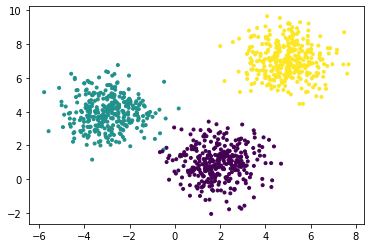

In [18]:
plt.scatter(x[:,0],x[:,1], c = labels_true, marker = '.')#, edgecolors='g')

# K-Means Clustering

In [19]:
from sklearn.cluster import KMeans

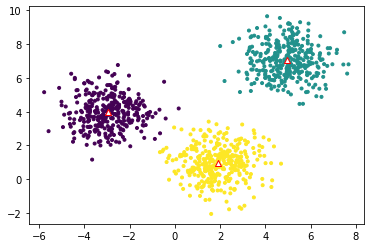

In [76]:
kmean = KMeans(n_clusters=3)
kmean.fit(x)
y_pred = kmean.predict(x)
centers = kmean.cluster_centers_
plt.scatter(x[:,0],x[:,1], c = y_pred, marker = '.')#, edgecolors='g')
plt.scatter(centers[:,0], centers[:,1],marker = '^', edgecolors='r',color ='w')

In [60]:
kmean.inertia_  # mean squared distance between each distance and it closest distance.

1902.684891218254

In [62]:
#when we know about the location of clusters
#n_init =10 is default. whole algorithm runs 10 times when you call fit() and sklearn keeps best solution. lowest inertia

good_init = np.array([[2,1],[-3,4],[5,7]])
kmean = KMeans(init= good_init, n_init = 1, n_clusters= 3) 

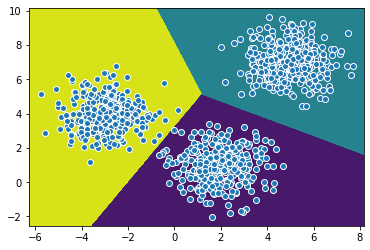

In [58]:
#first solution for visualization
x0_min, x0_max = min(x[:,0])-0.5 , max(x[:,0]) + 0.5
x1_min, x1_max = min(x[:,1])-0.5 , max(x[:,1]) + 0.5
xx, yy = np.meshgrid(np.arange(x0_min, x0_max,0.02),np.arange(x1_min, x1_max ,0.02))
z = kmean.predict(np.c_[xx.ravel(),yy.ravel()])
Z = z.reshape((xx.shape))
plt.contourf(xx,yy,Z)
plt.scatter(x[:,0], x[:,1],edgecolors='w')

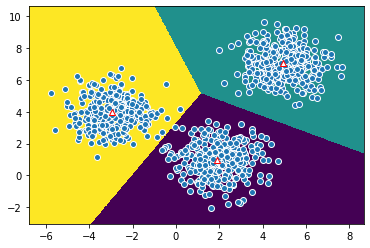

In [59]:
#second solution for visualization
x0_min, x0_max = min(x[:,0])-1 , max(x[:,0]) + 1
x1_min, x1_max = min(x[:,1])-1 , max(x[:,1]) + 1
xx, yy = np.meshgrid(np.arange(x0_min, x0_max,0.02),np.arange(x1_min, x1_max ,0.02))
z = kmean.predict(np.c_[xx.ravel(),yy.ravel()])
Z = z.reshape((xx.shape))
plt.imshow(Z, extent = (xx.min(), xx.max(), yy.min(), yy.max()), interpolation = 'nearest', aspect = 'auto',
           origin = 'lower')
plt.scatter(x[:,0], x[:,1],edgecolors='w')
plt.scatter(centers[:,0], centers[:,1],marker = '^', edgecolors='r',color ='w')

# MiniBatchKMeans

In [64]:
from sklearn.cluster import MiniBatchKMeans

In [65]:
mini_batch_km = MiniBatchKMeans(n_clusters= 3)
mini_batch_km.fit(x)

MiniBatchKMeans(n_clusters=3)

# finding optimal K in KMeans

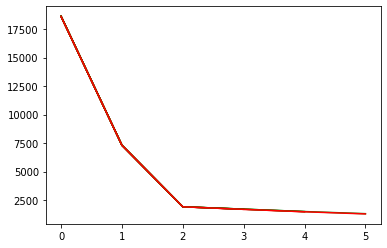

In [72]:
mini_inertia, inertia = [], []
for k in range(1,7):
    mini_batch_km = MiniBatchKMeans(n_clusters= k)
    mini_batch_km.fit(x)
    mini_inertia.append(mini_batch_km.inertia_)
    
    km = KMeans(n_clusters= k)
    km.fit(x)
    inertia.append(km.inertia_)
    plt.plot(mini_inertia,'g')
    plt.plot(inertia,'r')


In [74]:
from sklearn.metrics import silhouette_score

In [79]:
score = silhouette_score(x,kmean.labels_) 
score

0.7085927457791709

optimal number of clusters:  3


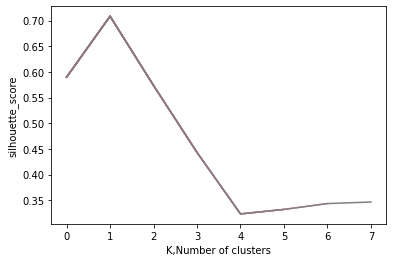

In [87]:
score = []
K = [2,3,4,5,6,7,8,9]
for k in np.arange(2,10):
    kmean = KMeans(n_clusters = k)
    kmean.fit(x)
    score.append(silhouette_score(x,kmean.labels_))
    plt.plot(score)
    plt.xlabel('K,Number of clusters')
    plt.ylabel('silhouette_score')
print('optimal number of clusters: ',K[np.argmax(score)])

# silhouette visualizing

# Using clustering for image segmentation

In [113]:
from imageio import imread
import os

(340, 720, 3)


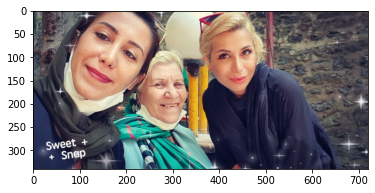

In [119]:
image = imread('WhatsApp Image 2020-08-08 at 05.09.53.jpeg')
print(image.shape)
plt.imshow(image)

In [116]:
x = image.reshape(-1,3)
x.shape

(244800, 3)

In [125]:
kmean = KMeans(n_clusters=8)
kmean.fit(x)
segmented_img = kmean.cluster_centers_[kmean.labels_]
segmented_img = segmented_img.reshape(image.shape)
segmented_img

array([[[107.45734644,  99.07960667,  99.25007838],
        [107.45734644,  99.07960667,  99.25007838],
        [ 61.96068822,  61.58830939,  75.25075659],
        ...,
        [ 61.96068822,  61.58830939,  75.25075659],
        [ 61.96068822,  61.58830939,  75.25075659],
        [ 61.96068822,  61.58830939,  75.25075659]],

       [[ 61.96068822,  61.58830939,  75.25075659],
        [107.45734644,  99.07960667,  99.25007838],
        [ 61.96068822,  61.58830939,  75.25075659],
        ...,
        [ 61.96068822,  61.58830939,  75.25075659],
        [ 61.96068822,  61.58830939,  75.25075659],
        [ 61.96068822,  61.58830939,  75.25075659]],

       [[ 61.96068822,  61.58830939,  75.25075659],
        [ 61.96068822,  61.58830939,  75.25075659],
        [ 61.96068822,  61.58830939,  75.25075659],
        ...,
        [ 61.96068822,  61.58830939,  75.25075659],
        [ 61.96068822,  61.58830939,  75.25075659],
        [ 61.96068822,  61.58830939,  75.25075659]],

       ...,

      

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


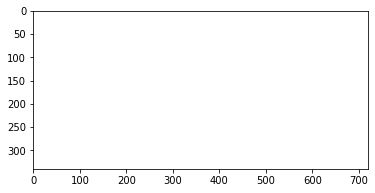

In [124]:
plt.imshow(segmented_img);


# using clustering for preprocessing

In [158]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [159]:
digits = load_digits()
y = digits.target
x = digits.data

#scaling x:
scaler = StandardScaler()
scaler.fit(x)
x_new = scaler.transform(x)


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
x_train_scal, x_test_scal, y_train, y_test = train_test_split(x_new, y, test_size = 0.2, random_state = 42)


In [160]:
log_clf = LogisticRegression()
log_clf.fit(x_train_scal, y_train)
y_pred_test = log_clf.predict(x_test_scal)
print(log_clf.score(x_test_scal, y_test))
print(accuracy_score(y_pred_test, y_test)) #it sames as log_reg.score()

0.9722222222222222
0.9722222222222222


In [161]:
#using kmeans clustering for improving in score of prediction:
pipeline = Pipeline([('kmean',KMeans(n_clusters =50 )),('log_clf',LogisticRegression())])
pipeline.fit(x_train, y_train)
pipeline.score(x_test, y_test)

C:\Users\fatem\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9611111111111111

In [163]:
param = dict(kmeans__n_clusters = range(2,100))
grid_search = GridSearchCV(pipeline, param, cv =3, verbose = 2)
grid_search.fit(x_train, y_train)
grid_search.best_params_
grid_search.score(x_test, y_test)

Fitting 3 folds for each of 98 candidates, totalling 294 fits
[CV] kmeans__n_clusters=2 ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


ValueError: Invalid parameter kmeans for estimator Pipeline(steps=[('kmean', KMeans(n_clusters=50)),
                ('log_clf', LogisticRegression())]). Check the list of available parameters with `estimator.get_params().keys()`.